In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [3]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor
0,1,27.724174,58015.584978,0.238881
1,2,20.164945,41411.346548,0.234433
2,3,18.771555,36953.435376,0.224725
3,4,16.617412,31673.736508,0.217586
4,5,27.902137,59150.390389,0.242000
...,...,...,...,...
395,396,12.189566,23415.204886,0.219283
396,397,12.662940,24918.728631,0.224640
397,398,4.833286,7854.976581,0.185523
398,399,14.577960,28841.437895,0.225848


In [4]:
rate = 'Fixed_Rate'

In [5]:
# Total costs:
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_ref = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'Opt_Size' + '_MgSO4'+'.xlsx')
cost_Const100 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'SA_Constant_100'+'.xlsx')
cost_Const10 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'SA_Constant_10'+'.xlsx')
cost_ConstPeak = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'SA_Constant_Peak'+'.xlsx')

# Clean up:
cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_ref = cost_ref.rename(columns={'Unnamed: 0': 'building id'})
cost_ref = cost_ref.sort_values(by=['building id'])
cost_ref = cost_ref.reset_index()
cost_ref = cost_ref[['building id', 'total cost ($)']]

cost_Const100 = cost_Const100.rename(columns={'Unnamed: 0': 'building id'})
cost_Const100 = cost_Const100.sort_values(by=['building id'])
cost_Const100 = cost_Const100.reset_index()
cost_Const100 = cost_Const100[['building id', 'total cost ($)']]

cost_Const10 = cost_Const10.rename(columns={'Unnamed: 0': 'building id'})
cost_Const10 = cost_Const10.sort_values(by=['building id'])
cost_Const10 = cost_Const10.reset_index()
cost_Const10 = cost_Const10[['building id', 'total cost ($)']]

cost_ConstPeak = cost_ConstPeak.rename(columns={'Unnamed: 0': 'building id'})
cost_ConstPeak = cost_ConstPeak.sort_values(by=['building id'])
cost_ConstPeak = cost_ConstPeak.reset_index()
cost_ConstPeak = cost_ConstPeak[['building id', 'total cost ($)']]

cost_ref

,building id,total cost ($)
0,1,3411.853730
1,2,2439.361398
2,3,2175.504185
3,4,1868.762140
4,5,3476.731842
...,...,...
395,396,1387.327722
396,397,1487.147655
397,398,473.586949
398,399,1707.027850


In [6]:
# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - Ref'] = cost_ref['total cost ($)']
cost_impacts_TES['total cost - Constant 100'] = cost_Const100['total cost ($)']
cost_impacts_TES['total cost - Constant 10'] = cost_Const10['total cost ($)']
cost_impacts_TES['total cost - Constant Peak'] = cost_ConstPeak['total cost ($)']

cost_impacts_TES['cost saving - Ref'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Ref']
cost_impacts_TES['cost saving % - Ref'] = cost_impacts_TES['cost saving - Ref']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - Constant 100'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Constant 100']
cost_impacts_TES['cost saving % - Constant 100'] = cost_impacts_TES['cost saving - Constant 100']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - Constant 10'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Constant 10']
cost_impacts_TES['cost saving % - Constant 10'] = cost_impacts_TES['cost saving - Constant 10']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - Constant Peak'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Constant Peak']
cost_impacts_TES['cost saving % - Constant Peak'] = cost_impacts_TES['cost saving - Constant Peak']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['peak load'] = peakLoad['Peak Load']
cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES,total cost - Ref,total cost - Constant 100,total cost - Constant 10,total cost - Constant Peak,cost saving - Ref,cost saving % - Ref,cost saving - Constant 100,cost saving % - Constant 100,cost saving - Constant 10,cost saving % - Constant 10,cost saving - Constant Peak,cost saving % - Constant Peak,peak load
0,1,3526.290877,3411.853730,3406.738627,3498.077221,3394.516465,114.437147,0.032453,119.552250,0.033903,28.213656,0.008001,131.774412,0.037369,27.724174
1,2,2523.385394,2439.361398,2435.615494,2502.247069,2426.987436,84.023996,0.033298,87.769900,0.034783,21.138325,0.008377,96.397958,0.038202,20.164945
2,3,2254.533101,2175.504185,2172.015786,2235.095724,2163.358878,79.028916,0.035053,82.517315,0.036601,19.437377,0.008621,91.174224,0.040440,18.771555
3,4,1938.359969,1868.762140,1865.620967,1921.019698,1858.294860,69.597829,0.035906,72.739002,0.037526,17.340272,0.008946,80.065109,0.041306,16.617412
4,5,3591.834993,3476.731842,3471.435097,3563.715631,3458.649302,115.103151,0.032046,120.399895,0.033520,28.119362,0.007829,133.185691,0.037080,27.902137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,1385.027235,1424.614051,1380.282825,49.592401,0.034513,51.892888,0.036114,12.306072,0.008564,56.637298,0.039416,12.189566
396,397,1535.499790,1487.147655,1485.078121,1523.093893,1480.087763,48.352134,0.031490,50.421669,0.032837,12.405897,0.008079,55.412026,0.036087,12.662940
397,398,491.584576,473.586949,472.824911,486.936046,471.116299,17.997627,0.036611,18.759666,0.038162,4.648531,0.009456,20.468278,0.041637,4.833286
398,399,1766.304961,1707.027850,1704.398327,1751.604532,1698.222579,59.277111,0.033560,61.906634,0.035049,14.700429,0.008323,68.082381,0.038545,14.577960


In [7]:
# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()
diff_all_cost_Ref = cost_impacts_TES["cost saving - Ref"].sum()
diff_all_cost_Constant100 = cost_impacts_TES["cost saving - Constant 100"].sum()
diff_all_cost_Constant10 = cost_impacts_TES["cost saving - Constant 10"].sum()
diff_all_cost_ConstantPeak = cost_impacts_TES["cost saving - Constant Peak"].sum()

pct_cost_saving_Ref = diff_all_cost_Ref/tot_cost_noTES
pct_cost_saving_Constant100 = diff_all_cost_Constant100/tot_cost_noTES
pct_cost_saving_Constant10 = diff_all_cost_Constant10/tot_cost_noTES
pct_cost_saving_ConstantPeak = diff_all_cost_ConstantPeak/tot_cost_noTES

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9
cost_impacts_TES


,building id,total cost - no TES,total cost - Ref,total cost - Constant 100,total cost - Constant 10,total cost - Constant Peak,cost saving - Ref,cost saving % - Ref,cost saving - Constant 100,cost saving % - Constant 100,cost saving - Constant 10,cost saving % - Constant 10,cost saving - Constant Peak,cost saving % - Constant Peak,peak load,Peak Load,Load,Load Factor
0,1,3526.290877,3411.853730,3406.738627,3498.077221,3394.516465,114.437147,0.032453,119.552250,0.033903,28.213656,0.008001,131.774412,0.037369,27.724174,27.724174,58015.584978,0.238881
1,2,2523.385394,2439.361398,2435.615494,2502.247069,2426.987436,84.023996,0.033298,87.769900,0.034783,21.138325,0.008377,96.397958,0.038202,20.164945,20.164945,41411.346548,0.234433
2,3,2254.533101,2175.504185,2172.015786,2235.095724,2163.358878,79.028916,0.035053,82.517315,0.036601,19.437377,0.008621,91.174224,0.040440,18.771555,18.771555,36953.435376,0.224725
3,4,1938.359969,1868.762140,1865.620967,1921.019698,1858.294860,69.597829,0.035906,72.739002,0.037526,17.340272,0.008946,80.065109,0.041306,16.617412,16.617412,31673.736508,0.217586
4,5,3591.834993,3476.731842,3471.435097,3563.715631,3458.649302,115.103151,0.032046,120.399895,0.033520,28.119362,0.007829,133.185691,0.037080,27.902137,27.902137,59150.390389,0.242000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,1385.027235,1424.614051,1380.282825,49.592401,0.034513,51.892888,0.036114,12.306072,0.008564,56.637298,0.039416,12.189566,12.189566,23415.204886,0.219283
396,397,1535.499790,1487.147655,1485.078121,1523.093893,1480.087763,48.352134,0.031490,50.421669,0.032837,12.405897,0.008079,55.412026,0.036087,12.662940,12.662940,24918.728631,0.224640
397,398,491.584576,473.586949,472.824911,486.936046,471.116299,17.997627,0.036611,18.759666,0.038162,4.648531,0.009456,20.468278,0.041637,4.833286,4.833286,7854.976581,0.185523
398,399,1766.304961,1707.027850,1704.398327,1751.604532,1698.222579,59.277111,0.033560,61.906634,0.035049,14.700429,0.008323,68.082381,0.038545,14.577960,14.577960,28841.437895,0.225848


In [7]:
cost_impacts_TES.max()
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
#ordered_cost
#ordered_cost.to_csv('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\ordered_cost.csv')
#ordered_cost.plot.scatter(x = 'Load Factor', y = 'cost saving % - MgSO4', s = 50)

building id                        400.000000
total cost - no TES               3866.092793
total cost - Ref                  3736.558056
total cost - Constant 100         3730.340530
total cost - Constant 10          3834.314878
total cost - Constant Peak        3716.527849
cost saving - Ref                  129.534737
cost saving % - Ref                  0.046018
cost saving - Constant 100         135.752264
cost saving % - Constant 100         0.048352
cost saving - Constant 10           31.777916
cost saving % - Constant 10          0.012009
cost saving - Constant Peak        149.564944
cost saving % - Constant Peak        0.052824
peak load                           30.477053
Peak Load                           30.477053
Load                             63936.968704
Load Factor                          0.280478
dtype: float64

In [8]:
# Dot plot:
ordered_cost_reset = cost_impacts_TES.sort_values(by='peak load')
ordered_cost_reset = ordered_cost_reset.reset_index()
ordered_cost_reset['building'] = ordered_cost_reset.index + 1
ordered_cost_reset

,index,building id,total cost - no TES,total cost - Ref,total cost - Constant 100,total cost - Constant 10,total cost - Constant Peak,cost saving - Ref,cost saving % - Ref,cost saving - Constant 100,cost saving % - Constant 100,cost saving - Constant 10,cost saving % - Constant 10,cost saving - Constant Peak,cost saving % - Constant Peak,peak load,Peak Load,Load,Load Factor,building
0,304,305,280.292317,269.204534,268.734214,277.471894,267.640757,11.087784,0.039558,11.558103,0.041236,2.820423,0.010062,12.651560,0.045137,2.931349,2.931349,4494.552000,0.175031,1
1,210,211,320.706929,306.432181,305.774648,316.926604,304.763850,14.274748,0.044510,14.932280,0.046561,3.780325,0.011787,15.943079,0.049712,3.267824,3.267824,5129.930228,0.179204,2
2,233,234,302.507901,288.808238,288.171196,298.875046,287.165011,13.699663,0.045287,14.336705,0.047393,3.632855,0.012009,15.342890,0.050719,3.335892,3.335892,4804.581801,0.164414,3
3,338,339,351.177610,336.725184,336.070590,347.369286,335.009374,14.452427,0.041154,15.107020,0.043018,3.808324,0.010844,16.168237,0.046040,3.346160,3.346160,5666.573658,0.193317,4
4,99,100,439.196709,421.669956,420.801578,434.730175,419.399737,17.526753,0.039906,18.395131,0.041884,4.466535,0.010170,19.796973,0.045075,4.456120,4.456120,7017.284235,0.179766,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,386,3466.234461,3356.766936,3351.815733,3439.154251,3340.132905,109.467525,0.031581,114.418728,0.033010,27.080210,0.007813,126.101556,0.036380,27.341019,27.341019,56719.004778,0.236815,396
396,0,1,3526.290877,3411.853730,3406.738627,3498.077221,3394.516465,114.437147,0.032453,119.552250,0.033903,28.213656,0.008001,131.774412,0.037369,27.724174,27.724174,58015.584978,0.238881,397
397,4,5,3591.834993,3476.731842,3471.435097,3563.715631,3458.649302,115.103151,0.032046,120.399895,0.033520,28.119362,0.007829,133.185691,0.037080,27.902137,27.902137,59150.390389,0.242000,398
398,399,400,3539.585834,3424.820699,3419.617934,3511.470440,3407.360457,114.765136,0.032423,119.967900,0.033893,28.115394,0.007943,132.225377,0.037356,28.411462,28.411462,57919.433045,0.232716,399


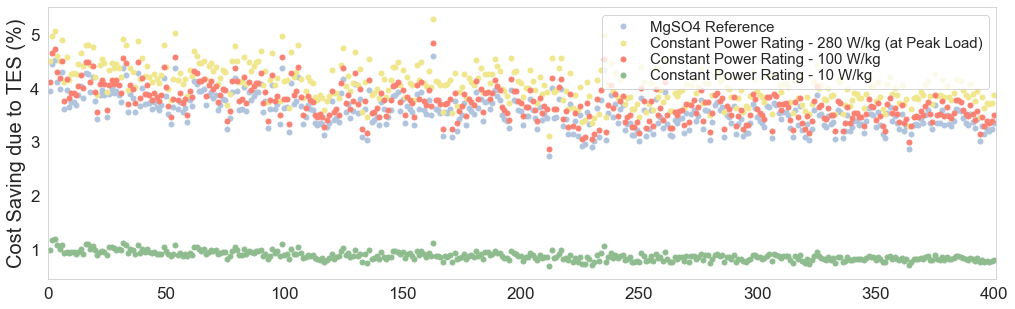

In [14]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - Ref']*100, marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='MgSO4 Reference')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - Constant Peak']*100, marker='o', ms=5, linestyle='',color = 'khaki', label='Constant Power Rating - 280 W/kg (at Peak Load)')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - Constant 100']*100, marker='o', ms=5, linestyle='',color = 'salmon', label='Constant Power Rating - 100 W/kg')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - Constant 10']*100, marker='o', ms=5, linestyle='',color = 'darkseagreen', label='Constant Power Rating - 10 W/kg')

ax.yaxis.set_visible(True)
ax.grid(False)
#ax.set_ylim(-1, max(counts))
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
#plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES (%)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=15, labelspacing=0.15, loc = 'best')
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_pct_SA.png', dpi=300, bbox_inches='tight')

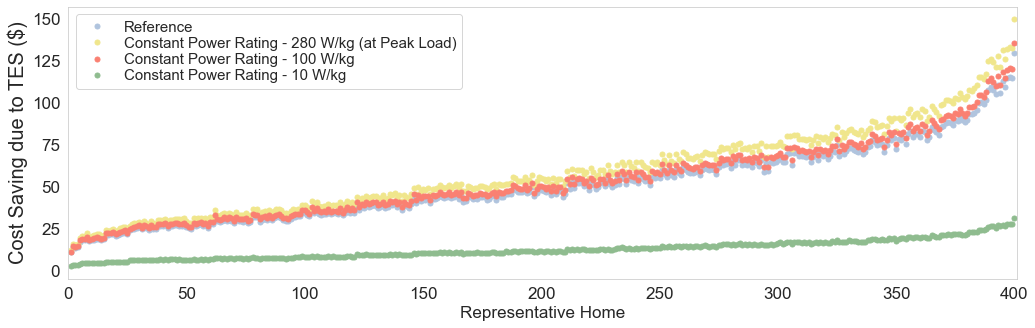

In [11]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - Ref'], marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Reference')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - Constant Peak'], marker='o', ms=5, linestyle='',color = 'khaki', label='Constant Power Rating - 280 W/kg (at Peak Load)')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - Constant 100'], marker='o', ms=5, linestyle='',color = 'salmon', label='Constant Power Rating - 100 W/kg')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - Constant 10'], marker='o', ms=5, linestyle='',color = 'darkseagreen', label='Constant Power Rating - 10 W/kg')

ax.yaxis.set_visible(True)
ax.grid(False)
#ax.set_ylim(-1, max(counts))
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
plt.xlabel("Representative Home",fontsize=17)
plt.ylabel("Cost Saving due to TES ($)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=15, labelspacing=0.15)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_SA.png', dpi=300, bbox_inches='tight')